# __Twierdzenie Bayesa, Sieci Bayesowskie, Naiwny Klasyfikator Bayesowski__  
## __Zadanie Praktyczne__  
### Krzysztof Stawarz, Lena Stec
### Kraków, 17.10.2023

_____

#### Backstory:  
Jesteśmy Data Scientist w firmie produkującej wino. Wspołpracujemy z Panią Grazynka.  
Pani Grazynka probowała napisalac skrypt pozwalajacy zaklasyfikowac zbior danych win, dla uproszeczenia `class_0`, `class_1` oraz `class_2` na podstawie 13 kolumn.  
Jednakze zagadnienia Machine Learning nie sa mocna strona Pani Grazynki (wszystko co nie w excelu to czarna magia!!1).  
Pani Grazynka wyslala nam jej notatki, gdzie probowala cos pokodowac. 

Pomoz Pani Grazynce, popraw jej kod aby byl dzialajacy i zaklasyfikuj wina z pomoca `Gaussian`, `Multinomial` i `Bernouli Naive Bayes Classifiers`.

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns
sns.set_style(style="darkgrid")

Dane Pani Grazynki znajduja sie w bibliotece `sklearn.datasets` (skorzystaj z funkcji `load_wine()`).

In [2]:
from sklearn import datasets

wine = datasets.load_wine()
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [3]:
list(wine.keys())

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names']

O kurcze! Jaki chaos! Dane są w jakimś dziwnym słowniku!  

#### 1. Wydobadz kolumny `data`, `target` i `feature_names` ze slownika. Sprawdz czy wymiary zgadzaja się z poleceniem.

In [4]:
data = wine["data"]
target = wine["target"]
feature_names = wine["feature_names"]

#  zmiania nazwy kolumny bo jest dluga i zle wyglada na wykresach
feature_names[-2] = "jakas_cecha"

In [ ]:
# Odpowiedz:
data = wine["data"]
target = wine["target"]
feature_names = wine["feature_names"]

#  zmiania nazwy kolumny bo jest dluga i zle wyglada na wykresach
feature_names[-2] = "jakas_cecha"

In [6]:
print(f"Wymiary danych: {data.shape}")
print(f"Dlugosc listy nazw kolumn: {len(feature_names)}")
print(f"Wymiary kolumny target: {target.shape}")
print(f"Unikalne klasy w kolumnie target: {np.unique(target)}")

Wymiary danych: (178, 13)
Dlugosc listy nazw kolumn: 13
Wymiary kolumny target: (178,)
Unikalne klasy w kolumnie target: [0 1 2]


#### 2 Polacz dane w jedna tabelke `df`, odpowiednio nazwij kolumny.

In [7]:
data_with_target = np.c_[data, target]
display(data_with_target)
display(data_with_target.shape)

array([[  14.23,    1.71,    2.43, ...,    3.92, 1065.  ,    0.  ],
       [  13.2 ,    1.78,    2.14, ...,    3.4 , 1050.  ,    0.  ],
       [  13.16,    2.36,    2.67, ...,    3.17, 1185.  ,    0.  ],
       ...,
       [  13.27,    4.28,    2.26, ...,    1.56,  835.  ,    2.  ],
       [  13.17,    2.59,    2.37, ...,    1.62,  840.  ,    2.  ],
       [  14.13,    4.1 ,    2.74, ...,    1.6 ,  560.  ,    2.  ]])

(178, 14)

In [9]:
df = pd.DataFrame(data=data_with_target,
                  columns=feature_names+["target"])

df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,jakas_cecha,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0.0


In [ ]:
#  Odpowiedz:
df = pd.DataFrame(data=data_with_target,
                  columns=feature_names+["target"])

df.head()

#### 3. Sprawdz, czy w `df `sa jakies braki oraz czy wszystkie kolumny są danymi numerycznymi  
Hint: Jest jedna bardzo przydatna funkcja, zaczynajaca sie na `i`, ktora moze w tym pomoc...

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   alcohol               178 non-null    float64
 1   malic_acid            178 non-null    float64
 2   ash                   178 non-null    float64
 3   alcalinity_of_ash     178 non-null    float64
 4   magnesium             178 non-null    float64
 5   total_phenols         178 non-null    float64
 6   flavanoids            178 non-null    float64
 7   nonflavanoid_phenols  178 non-null    float64
 8   proanthocyanins       178 non-null    float64
 9   color_intensity       178 non-null    float64
 10  hue                   178 non-null    float64
 11  jakas_cecha           178 non-null    float64
 12  proline               178 non-null    float64
 13  target                178 non-null    float64
dtypes: float64(14)
memory usage: 19.6 KB


In [ ]:
#  Odpowiedz:
df.info()

#### 4. Sprawdź histogramy 13stu cech i zobacz, czy wyglądają naturalnie

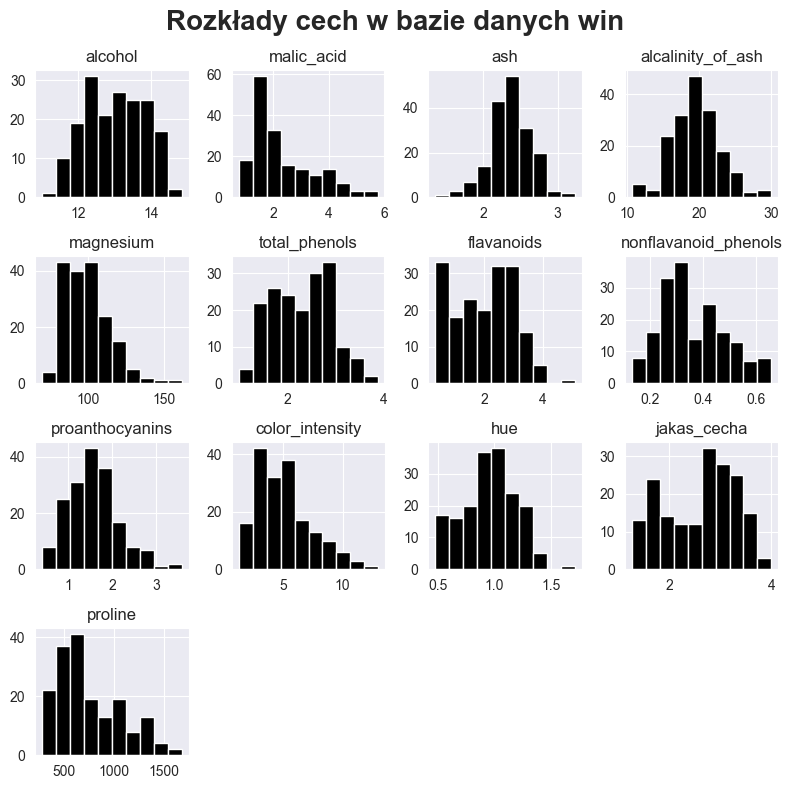

In [11]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(8,8), layout="tight")

#  cool python oneliner
[axes[x][y].hist(df.iloc[:, 4*x+y], color="black") and (axes[x][y]).set_title(feature_names[4*x+y]) if (x!=3 or y<1) else plt.delaxes(axes[x][y]) for y in range(4) for x in range(4)]

fig.suptitle("Rozkłady cech w bazie danych win", fontsize=20, weight="bold")
plt.show()

notka od bediego: 1) polecam nauczyc sie pythonowych onelinerow bo sa kozackie i odrozniaja zwyklego zjadacza chelba od prawdziwego enjoyera weza 2) na przyszlosc polecam `seaborn.pairplot()`, jest duzo ladniejszy prostszy w uzyciu i daje podobny efekt + wiecej

/Users/stawager/anaconda3/envs/portfolio/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


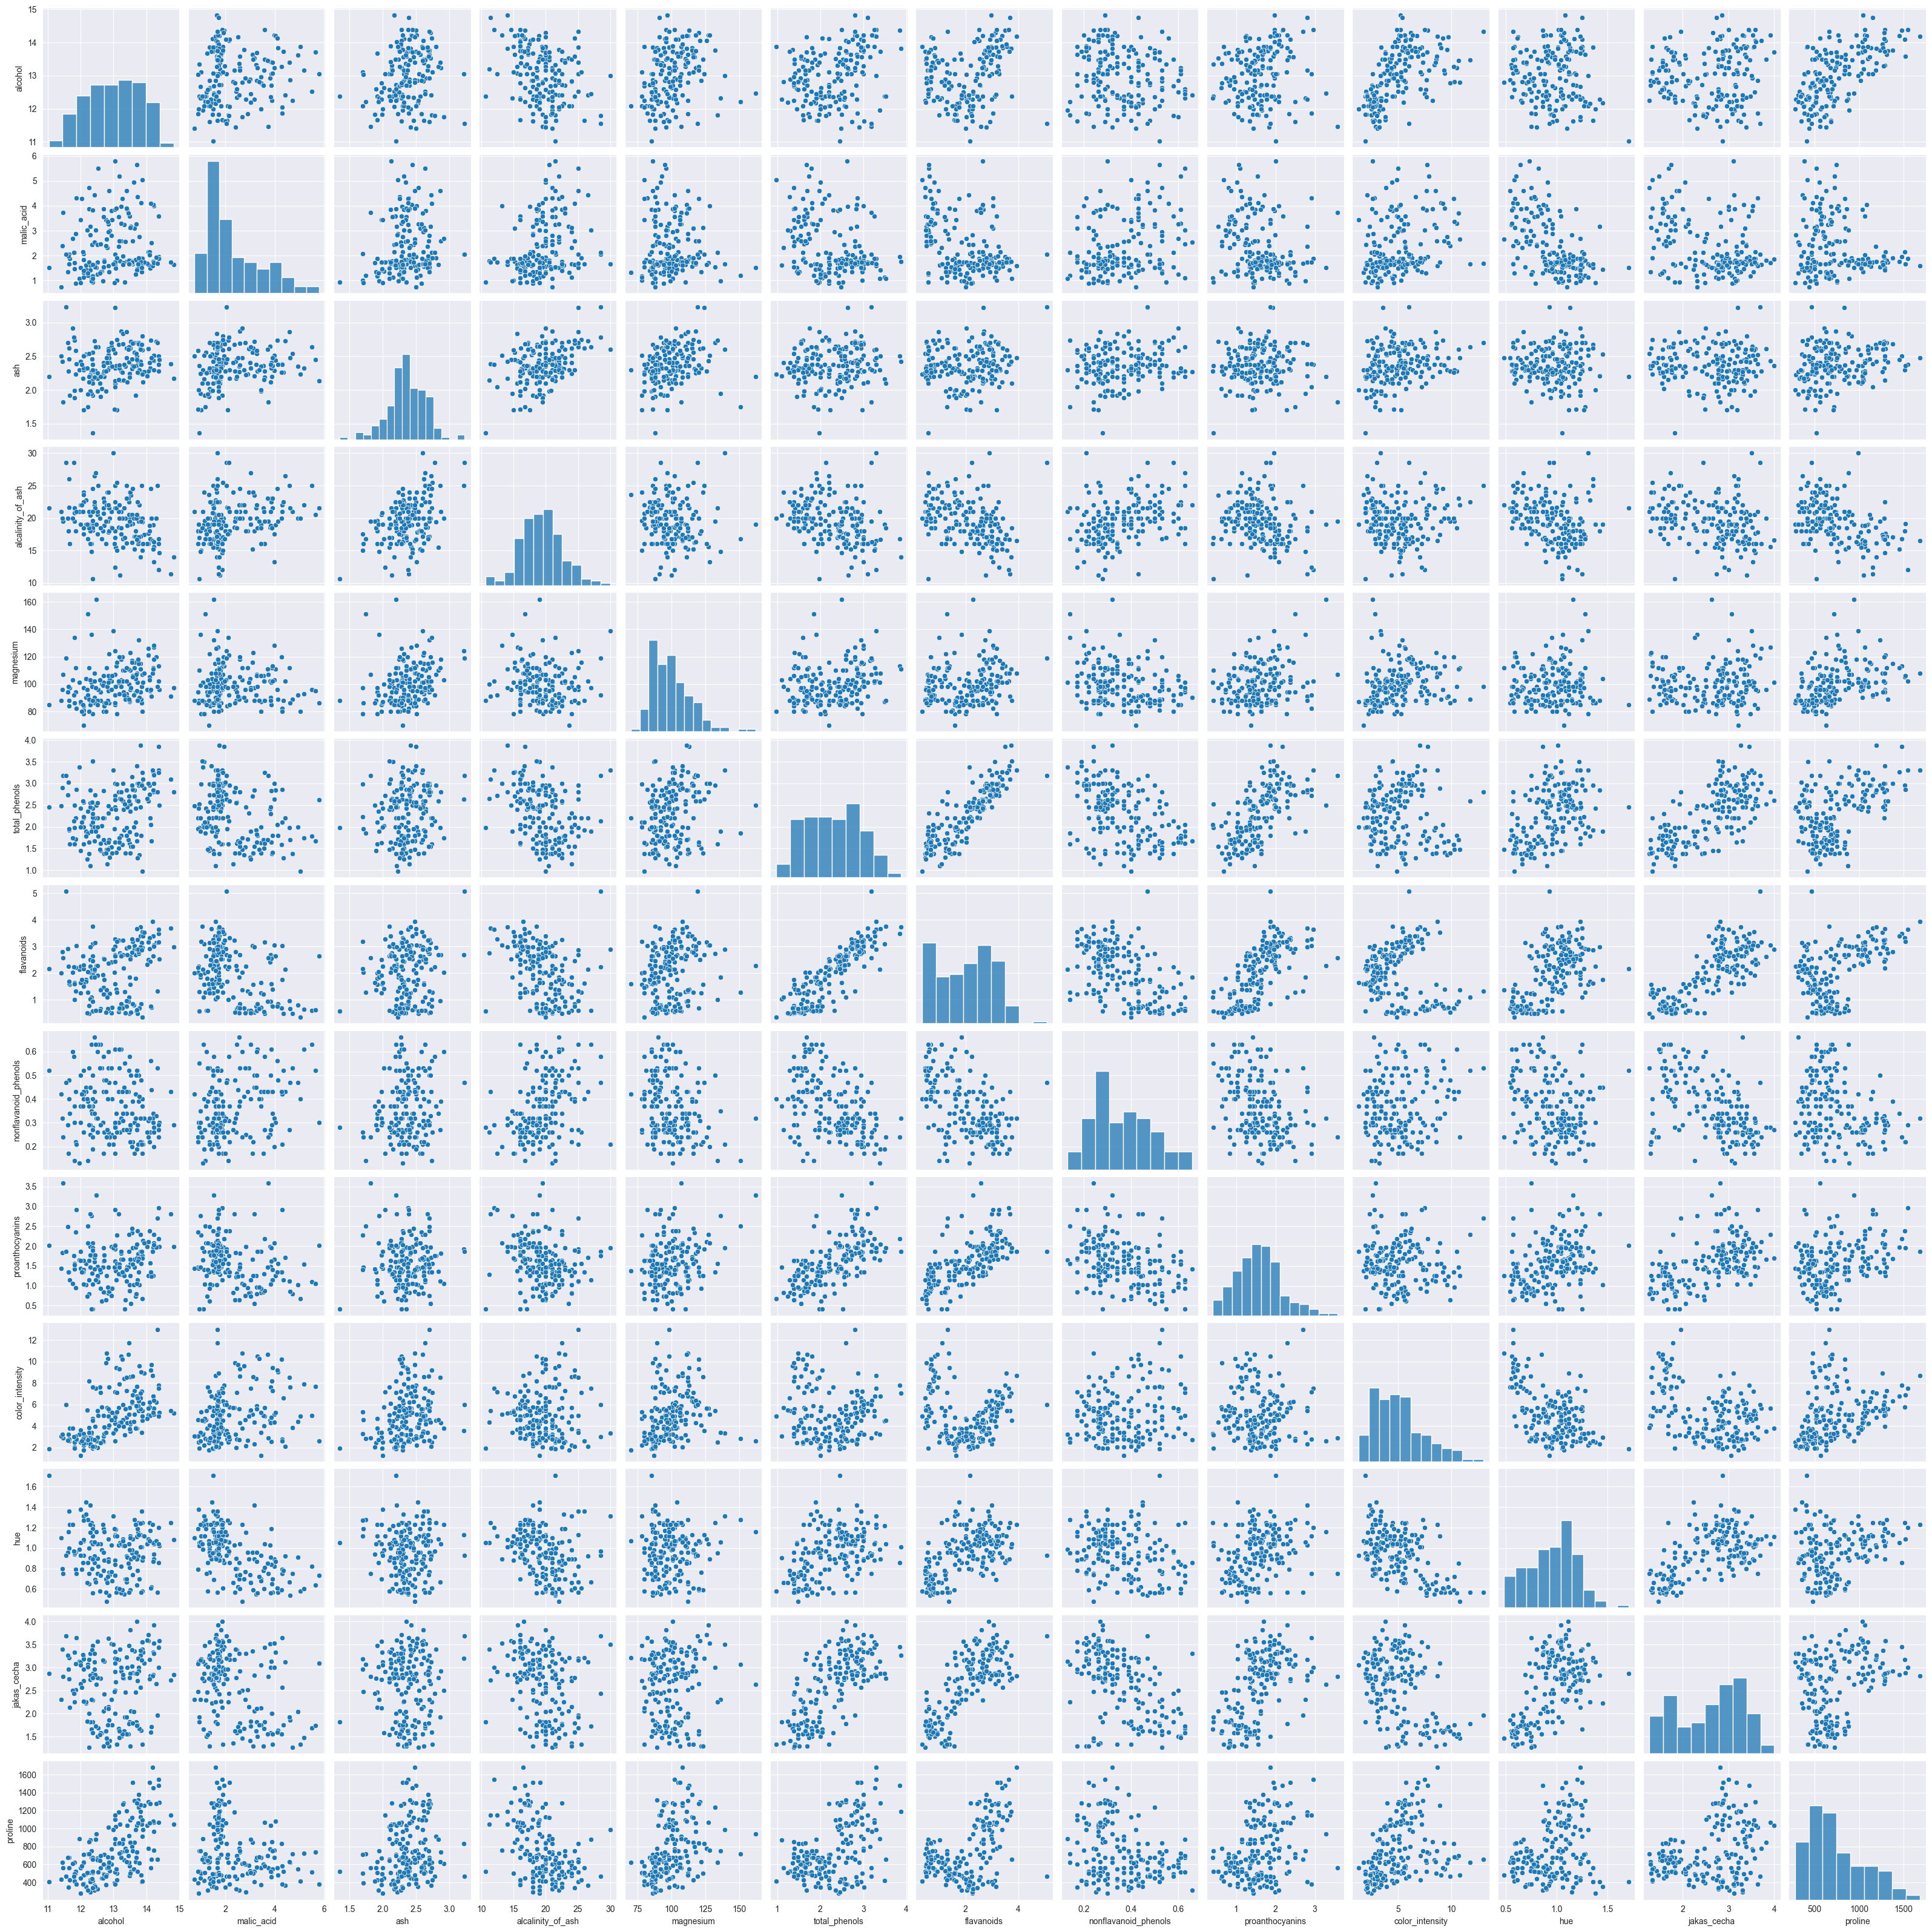

In [12]:
sns.pairplot(df.iloc[:, :-1])
plt.show()

#### 5.1 Sprawdź, jak cechy są ze sobą skorelowane

In [13]:
df.corr()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,jakas_cecha,proline,target
alcohol,1.000000,0.094397,0.211545,-0.310235,0.270798,0.289101,0.236815,-0.155929,0.136698,0.546364,-0.071747,0.072343,0.643720,-0.328222
malic_acid,0.094397,1.000000,0.164045,0.288500,-0.054575,-0.335167,-0.411007,0.292977,-0.220746,0.248985,-0.561296,-0.368710,-0.192011,0.437776
ash,0.211545,0.164045,1.000000,0.443367,0.286587,0.128980,0.115077,0.186230,0.009652,0.258887,-0.074667,0.003911,0.223626,-0.049643
alcalinity_of_ash,-0.310235,0.288500,0.443367,1.000000,-0.083333,-0.321113,-0.351370,0.361922,-0.197327,0.018732,-0.273955,-0.276769,-0.440597,0.517859
magnesium,0.270798,-0.054575,0.286587,-0.083333,1.000000,0.214401,0.195784,-0.256294,0.236441,0.199950,0.055398,0.066004,0.393351,-0.209179
total_phenols,0.289101,-0.335167,0.128980,-0.321113,0.214401,1.000000,0.864564,-0.449935,0.612413,-0.055136,0.433681,0.699949,0.498115,-0.719163
flavanoids,0.236815,-0.411007,0.115077,-0.351370,0.195784,0.864564,1.000000,-0.537900,0.652692,-0.172379,0.543479,0.787194,0.494193,-0.847498
nonflavanoid_phenols,-0.155929,0.292977,0.186230,0.361922,-0.256294,-0.449935,-0.537900,1.000000,-0.365845,0.139057,-0.262640,-0.503270,-0.311385,0.489109
proanthocyanins,0.136698,-0.220746,0.009652,-0.197327,0.236441,0.612413,0.652692,-0.365845,1.000000,-0.025250,0.295544,0.519067,0.330417,-0.499130
color_intensity,0.546364,0.248985,0.258887,0.018732,0.199950,-0.055136,-0.172379,0.139057,-0.025250,1.000000,-0.521813,-0.428815,0.316100,0.265668


In [ ]:
#  Odpowiedz:
df.corr()

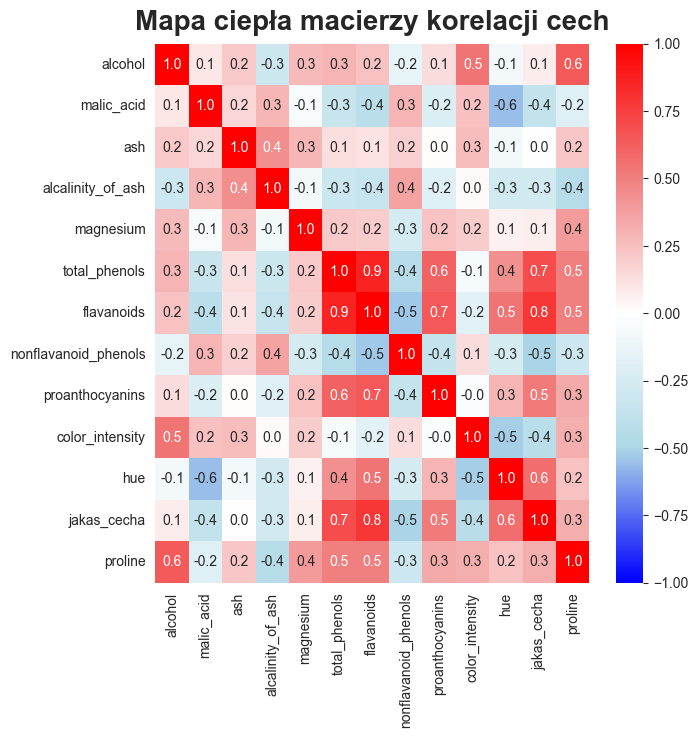

In [14]:
from matplotlib.colors import LinearSegmentedColormap
plt.figure(figsize=(7, 7))
sns.heatmap(df.iloc[:, :-1].corr(), annot=True, fmt=".1f", vmin=-1., vmax=1., 
            cmap=matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", list(zip([0.0, 0.25, 0.5, 0.75 , 1.0] , ["blue", "lightblue", "white", "lightcoral", "red"]))))
plt.title("Mapa ciepła macierzy korelacji cech", fontsize=20, weight="bold", pad=10)
plt.show()

#### 5. Podziel dane na zbiór treningowy i testowy w stosunku `3:1`

In [15]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=2025)

In [16]:
#  Odpowiedz:
from sklearn.model_selection import train_test_split

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.75, random_state=2025)

#### 6. Zaimportuj trzy potrzebne klasyfikatory, stworz modele i naucz je na danych testowych uzywajac metody `.fit()`

In [18]:
#  Odpowiedz:
from sklearn.naive_bayes import GaussianNB, BernoulliNB, MultinomialNB

gnb = GaussianNB().fit(X_train, y_train)
mnb = MultinomialNB().fit(X_train, y_train)
bnb = BernoulliNB().fit(X_train, y_train)

In [ ]:
#  Odpowiedz:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

gnb = GaussianNB().fit(X_train, y_train)
mnb = MultinomialNB().fit(X_train, y_train)
bnb = BernoulliNB().fit(X_train, y_train)

#### 7. Uźyj nauczonych modeli do predykcji klas i porównaj z `y_test`, uzywajac `accuracy_score` oraz `confusion_matrix`.

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)    
y_pred_bnb = bnb.predict(X_test)

accuracy_gnb = round(accuracy_score(y_pred_gnb, y_test), 2)
accuracy_mnb = round(accuracy_score(y_pred_mnb, y_test), 2)
accuracy_bnb = round(accuracy_score(y_pred_bnb, y_test), 2)

print(f"Accuracy Gaussian: {accuracy_gnb}")
print(f"Accuracy Multinomial: {accuracy_mnb}")
print(f"Accuracy Bernoulli: {accuracy_bnb}")

Accuracy Gaussian: 1.0
Accuracy Multinomial: 0.84
Accuracy Bernoulli: 0.33


In [ ]:
#  Odpowiedz:
from sklearn.metrics import accuracy_score, confusion_matrix

y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)    
y_pred_bnb = bnb.predict(X_test)

accuracy_gnb = round(accuracy_score(y_test, y_pred_gnb), 2)
accuracy_mnb = round(accuracy_score(y_test, y_pred_mnb), 2)
accuracy_bnb = round(accuracy_score(y_test, y_pred_bnb), 2)

print(f"Accuracy Gaussian: {accuracy_gnb}")
print(f"Accuracy Multinomial: {accuracy_mnb}")
print(f"Accuracy Bernoulli: {accuracy_bnb}")

In [20]:
cm_gnb = confusion_matrix(y_test, y_pred_gnb)
cm_mnb = confusion_matrix(y_test, y_pred_mnb)
cm_bnb = confusion_matrix(y_test, y_pred_bnb)

display(cm_gnb)
display(cm_mnb)
display(cm_bnb)

array([[20,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 10]])

array([[18,  2,  0],
       [ 1, 12,  2],
       [ 1,  1,  8]])

array([[ 0, 20,  0],
       [ 0, 15,  0],
       [ 0, 10,  0]])

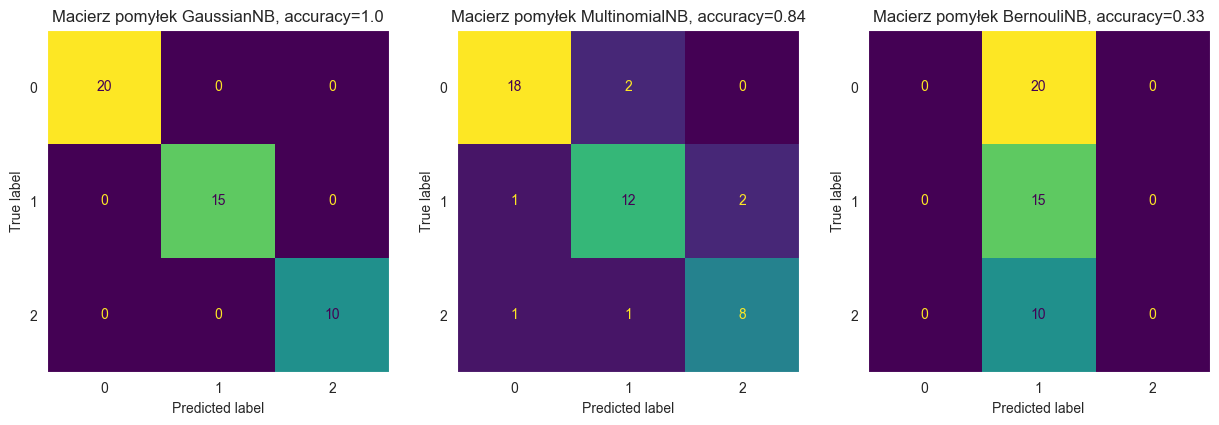

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, axs = plt.subplots(1, 3, figsize=(15, 7))

cmap = matplotlib.colors.ListedColormap(["lightcoral", "lightgreen"])

disp_gnb = ConfusionMatrixDisplay(confusion_matrix=cm_gnb, display_labels=gnb.classes_.astype(int))
disp_gnb.plot(values_format='d', ax=axs[0], colorbar=False)
axs[0].set_title(f"Macierz pomyłek GaussianNB, accuracy={accuracy_gnb}")
axs[0].grid(False)

disp_mnb = ConfusionMatrixDisplay(confusion_matrix=cm_mnb, display_labels=mnb.classes_.astype(int))
disp_mnb.plot(values_format='d', ax=axs[1], colorbar=False)
axs[1].set_title(f"Macierz pomyłek MultinomialNB, accuracy={accuracy_mnb}")
axs[1].grid(False)

disp_bnb= ConfusionMatrixDisplay(confusion_matrix=cm_bnb, display_labels=bnb.classes_.astype(int))
disp_bnb.plot(values_format='d', ax=axs[2], colorbar=False)
axs[2].set_title(f"Macierz pomyłek BernouliNB, accuracy={accuracy_bnb}")
axs[2].grid(False)

plt.show()

# Wnioski? 🤪